##### Practical 7

Write a program to implement autoencoder, LNet5, VGG16, AlexNet on MNIST dataset. Compare the result in terms of training time and accuracy.

Batch Size = 256, Epochs = 20

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import time

In [8]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")


#### Autoencoder

313/313 [==============================] - 1s 2ms/step


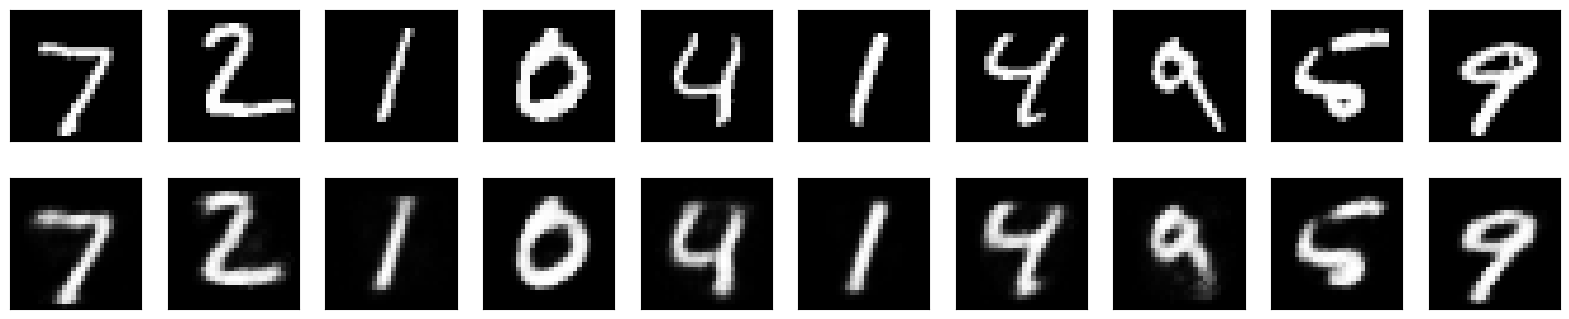

313/313 [==============================] - 1s 2ms/step


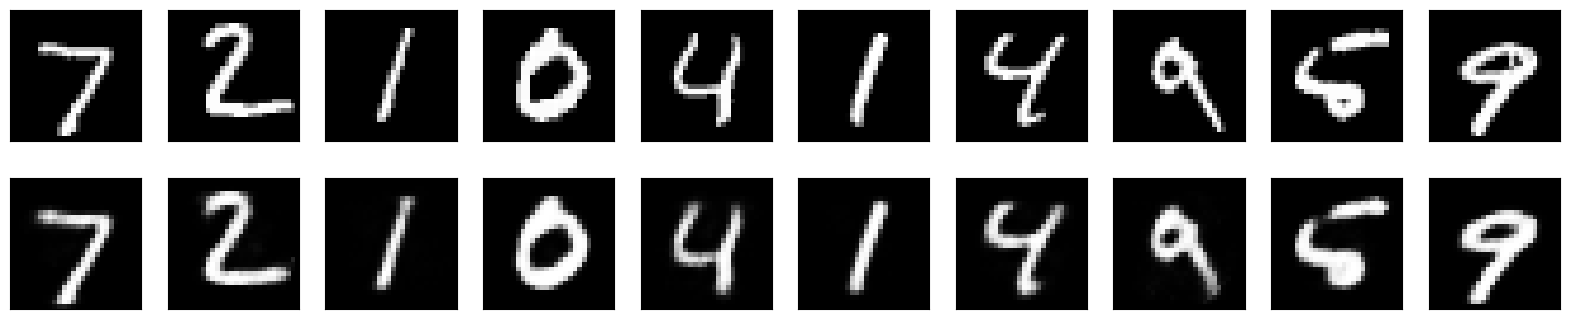

313/313 [==============================] - 1s 2ms/step


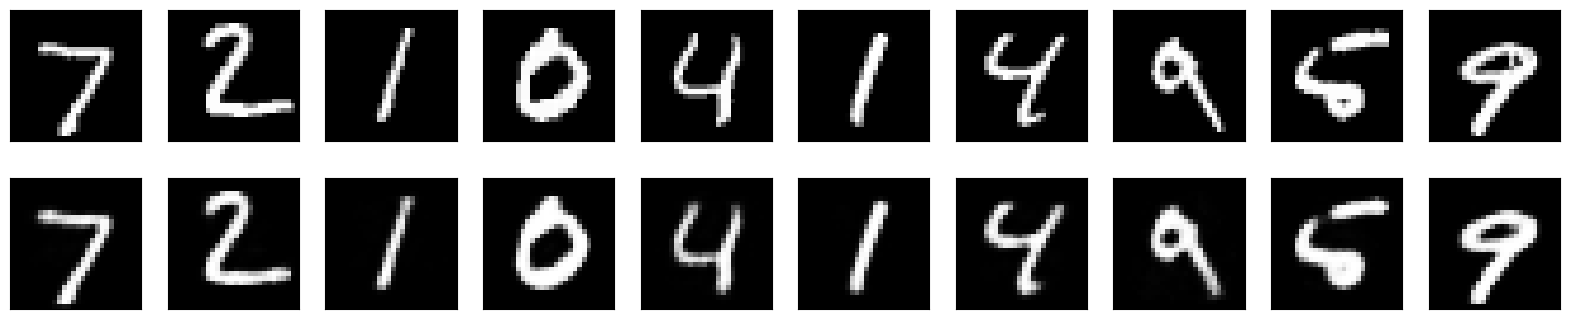

313/313 [==============================] - 1s 2ms/step


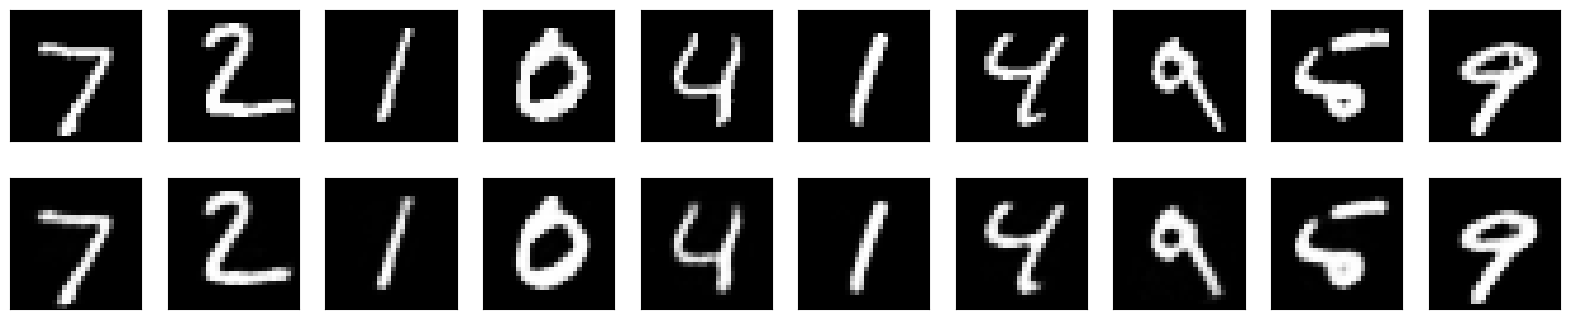

313/313 [==============================] - 1s 2ms/step


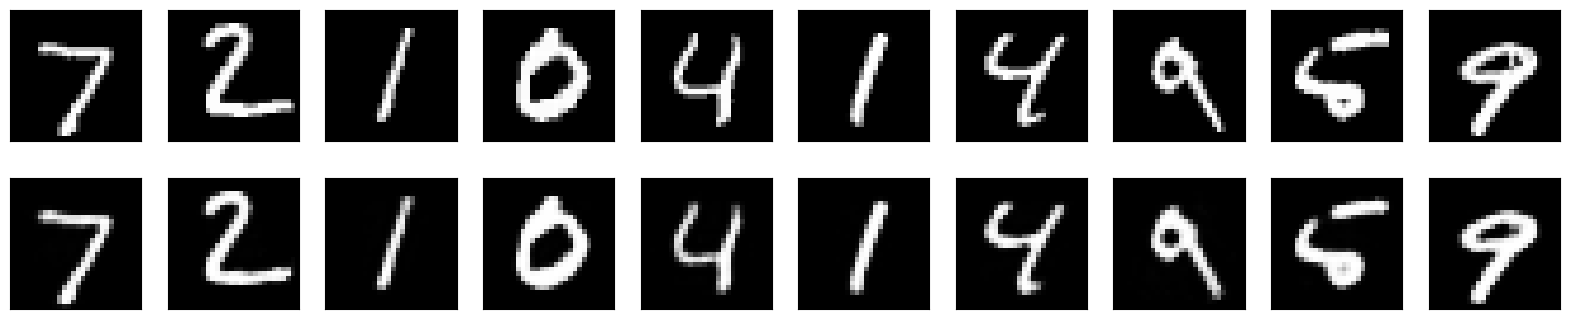

313/313 [==============================] - 1s 2ms/step


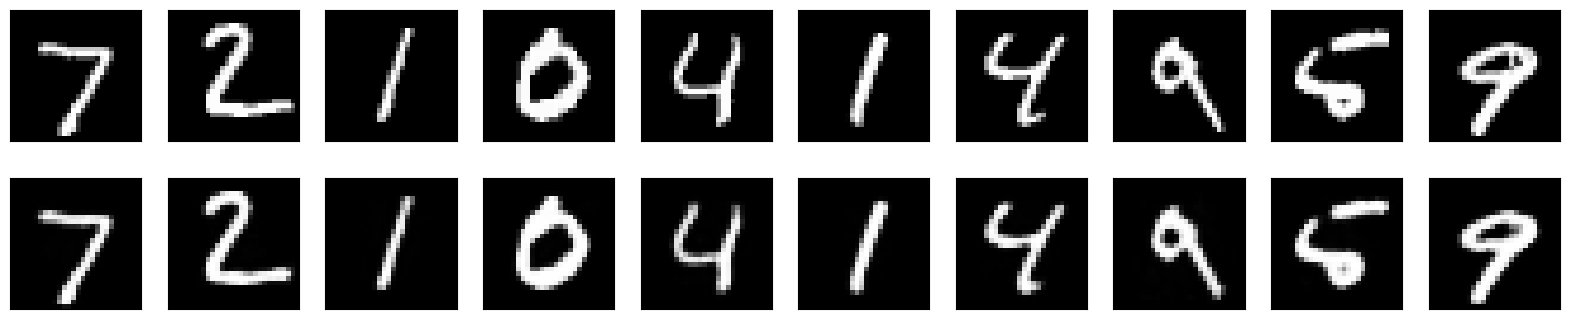

313/313 [==============================] - 1s 2ms/step


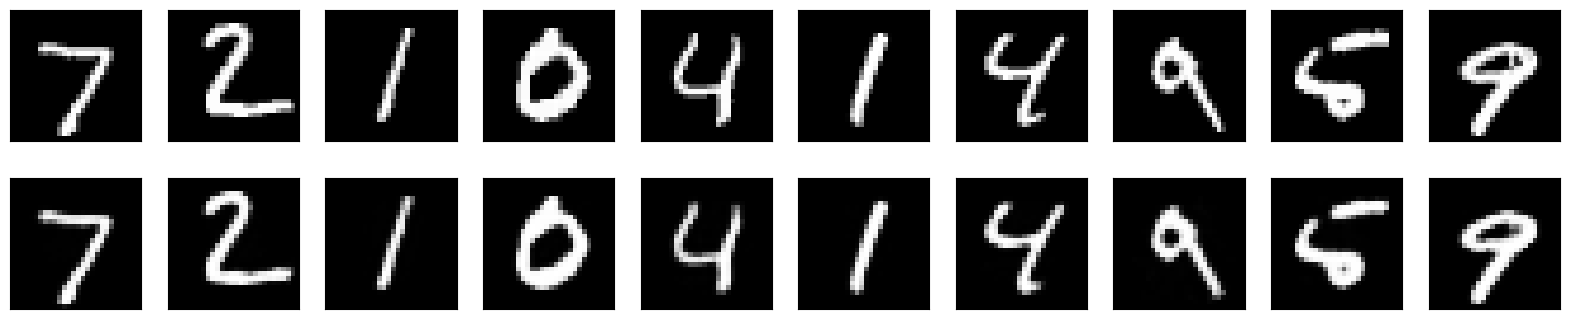

313/313 [==============================] - 1s 2ms/step


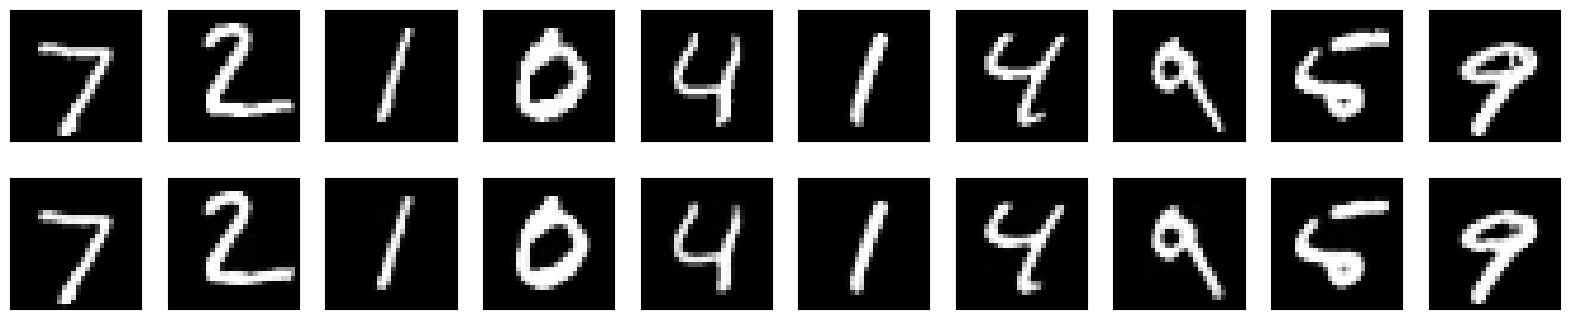

313/313 [==============================] - 1s 2ms/step


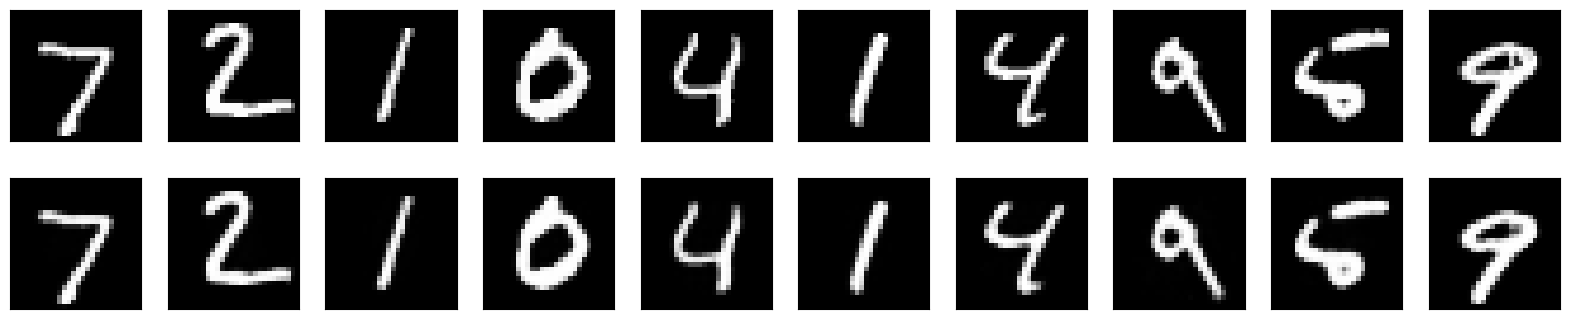

313/313 [==============================] - 1s 2ms/step


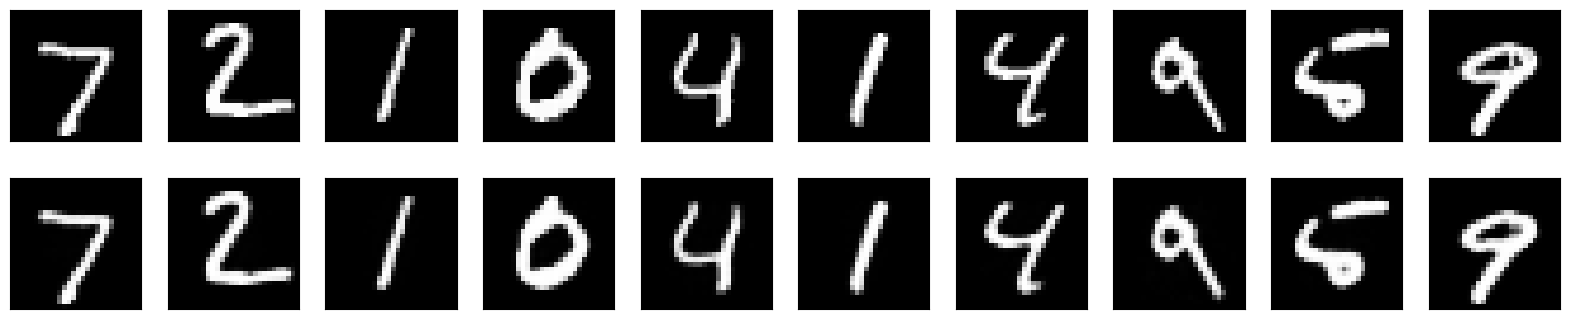

313/313 [==============================] - 1s 2ms/step


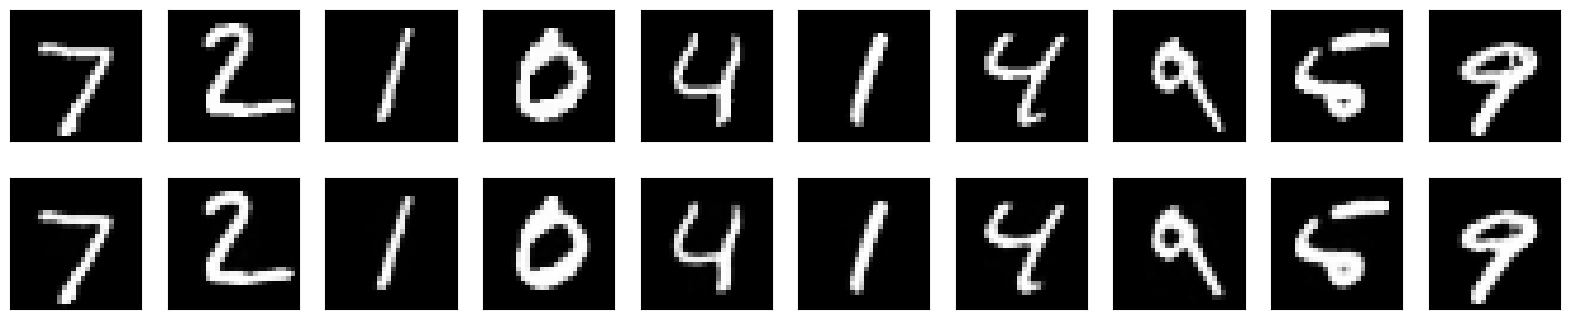

313/313 [==============================] - 1s 2ms/step


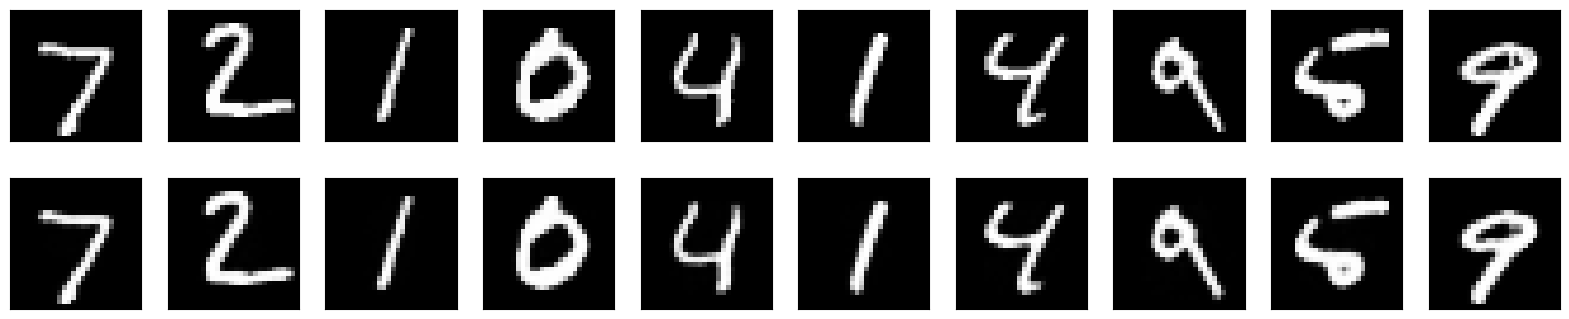

313/313 [==============================] - 1s 2ms/step


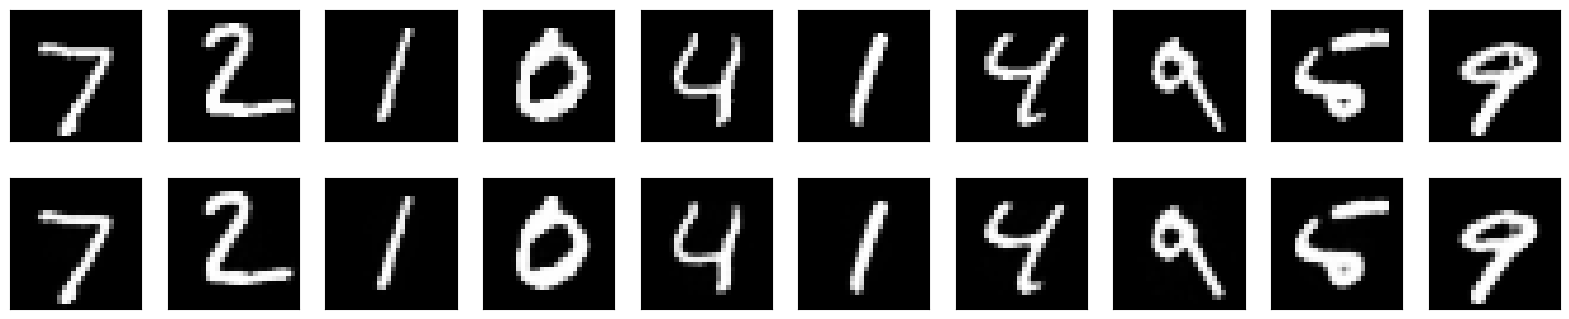

313/313 [==============================] - 1s 2ms/step


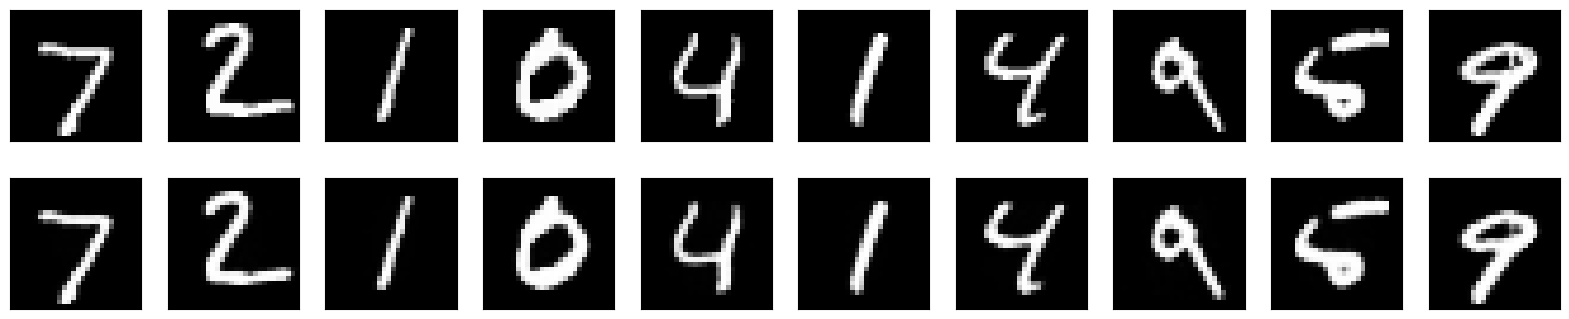

313/313 [==============================] - 1s 2ms/step


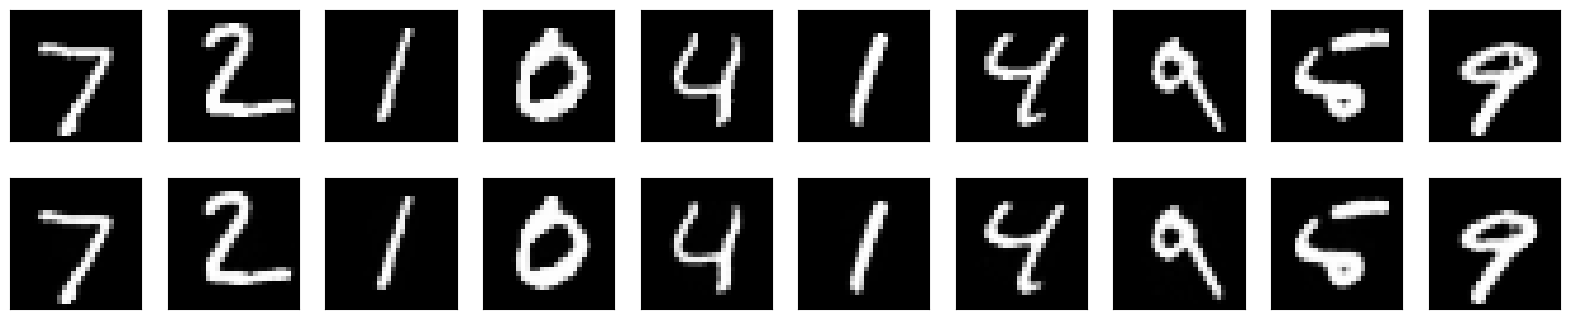

313/313 [==============================] - 1s 2ms/step


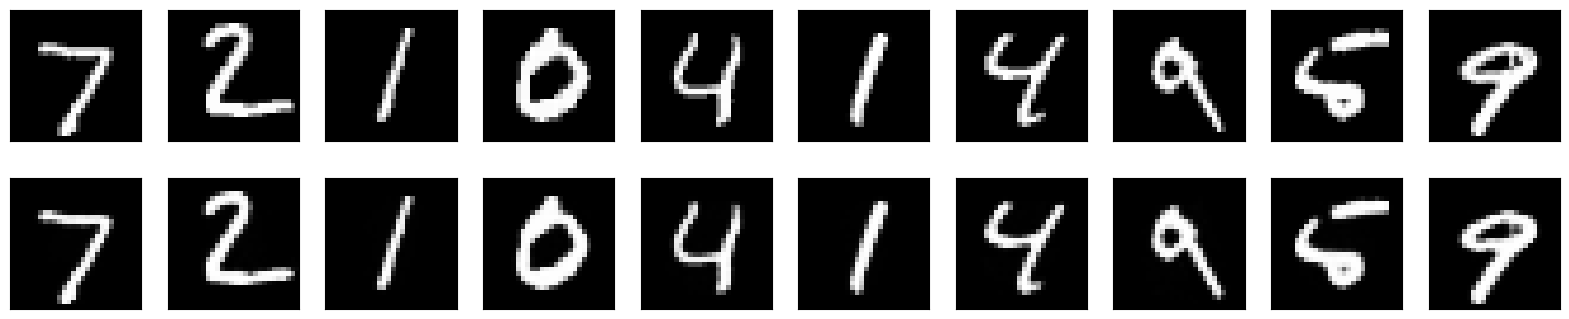

313/313 [==============================] - 1s 2ms/step


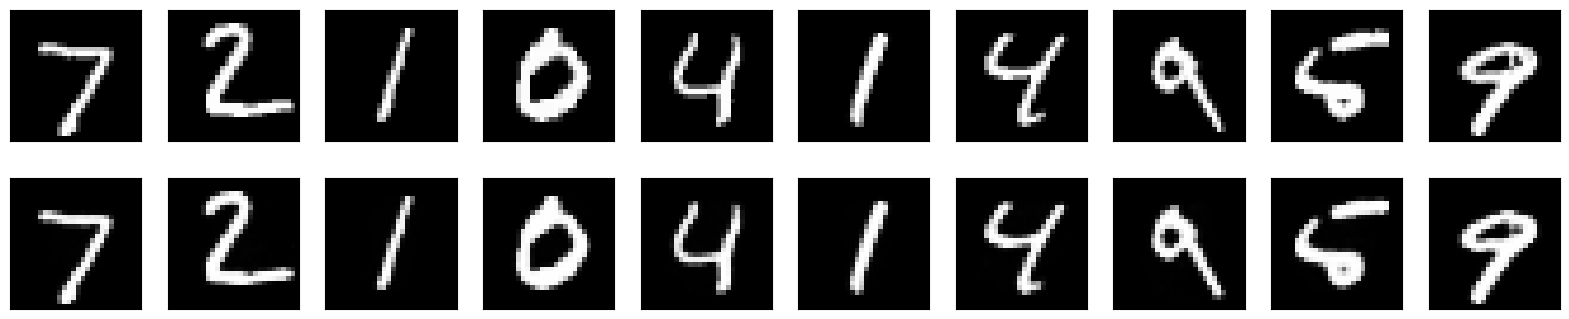

313/313 [==============================] - 1s 2ms/step


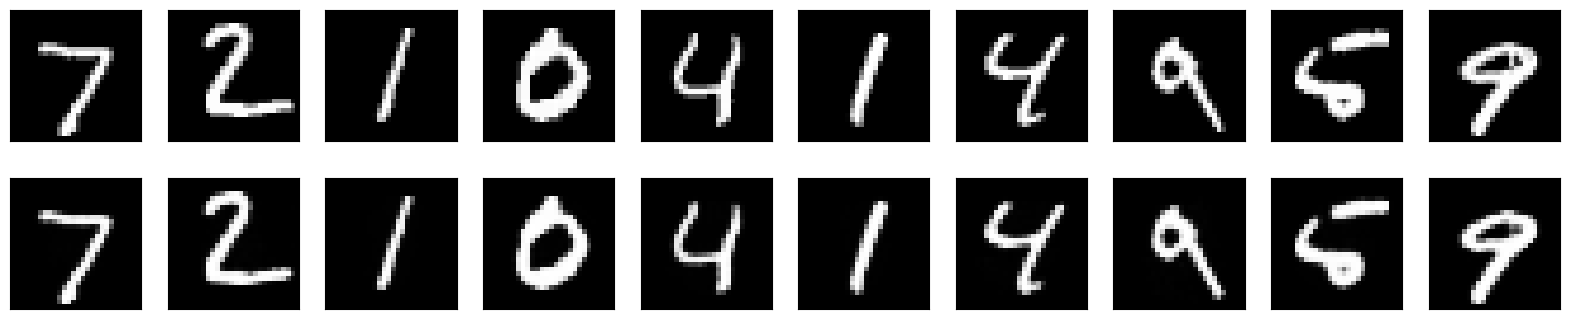

313/313 [==============================] - 1s 2ms/step


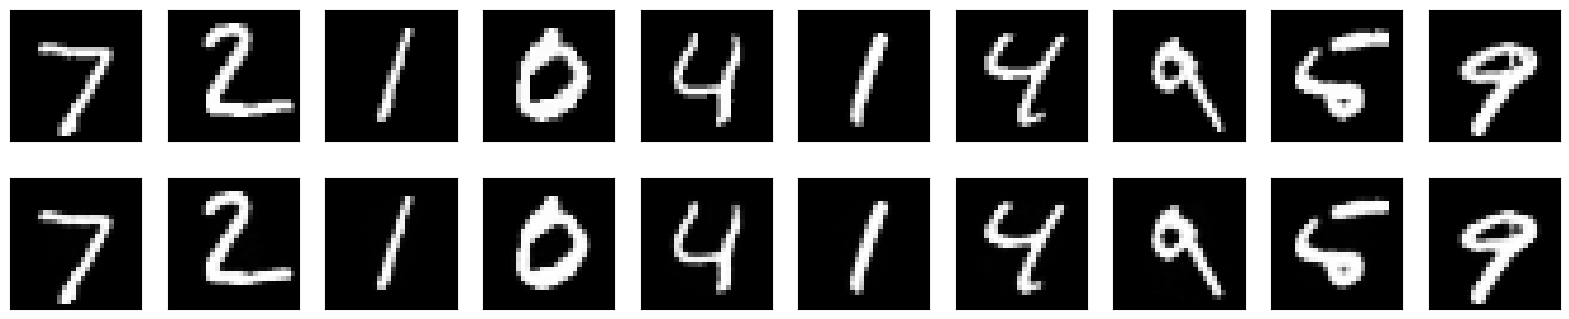

313/313 [==============================] - 1s 2ms/step


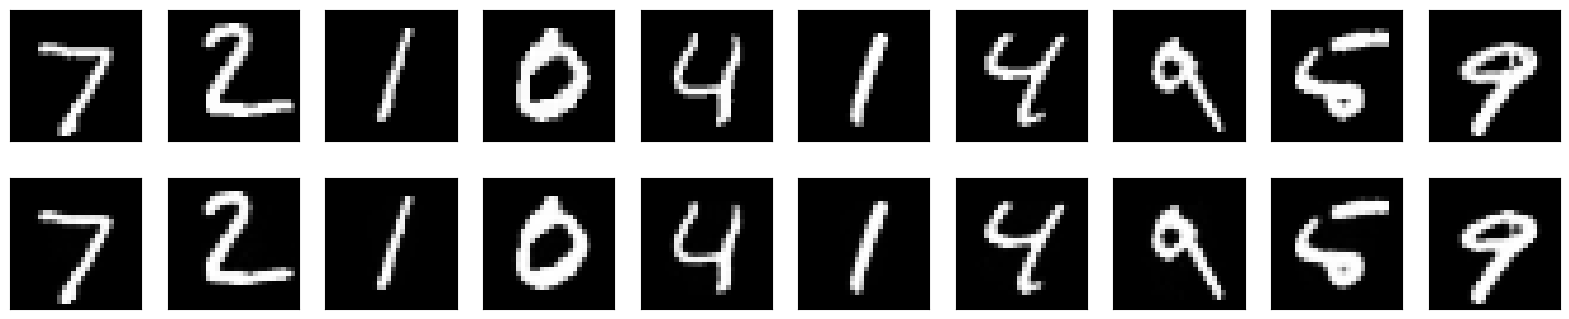

In [9]:
input_dim = x_train.shape[1]
encoding_dim = 392

input_layer = Input(shape=(input_dim,))
encoding_layer = Dense(encoding_dim, activation='relu')(input_layer)
decoding_layer = Dense(input_dim, activation='sigmoid')(encoding_layer) 

autoencoder = Model(input_layer, decoding_layer)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics = ['accuracy'])

start = time.time()

# Train the autoencoder with L1 and L2 regularization
num_epochs = 20
batch_size = 256

for epoch in range(num_epochs):
    # Fit the autoencoder on training data
    history = autoencoder.fit(x_train, x_train, 
                              batch_size=batch_size, 
                              epochs=1, 
                              verbose=1, 
                              shuffle=True)

    # Generate reconstructed images from test data
    decoded_imgs = autoencoder.predict(x_test)

    # Display a few original and reconstructed images
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
#history = autoencoder.fit(x_train, x_train, batch_size=256, epochs=20, verbose = 1,shuffle=True)
end = time.time()
AutoencoderTime = end - start 


In [10]:
AutoencoderAcc = history.history['accuracy']
print(f"Training accuracy for Autoencoder: {AutoencoderAcc[0]*100}%")

print("Training time for Autoencoder: ", AutoencoderTime, "seconds")

Training accuracy for Autoencoder: 1.758333295583725%
Training time for Autoencoder:  77.88794779777527 seconds


#### AlexNet

In [11]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the images for input to the model
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

# Normalize the pixel values to between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert the labels to one-hot vectors
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the model architecture
model = Sequential()
model.add(Conv2D(96, (11, 11), input_shape=(28, 28, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
# Train the model
ANHistory = model.fit(train_images, train_labels, batch_size=256, epochs=20)
end = time.time()
ANTime = end - start 

# Evaluate the model on the test set
ANLoss, ANAcc = model.evaluate(train_images, train_labels)


Epoch 1/20
235/235 [==============================] - 12s 41ms/step - loss: 0.3958 - accuracy: 0.8621
Epoch 2/20
235/235 [==============================] - 10s 41ms/step - loss: 0.0587 - accuracy: 0.9837
Epoch 3/20
235/235 [==============================] - 10s 41ms/step - loss: 0.0420 - accuracy: 0.9888
Epoch 4/20
235/235 [==============================] - 9s 40ms/step - loss: 0.0317 - accuracy: 0.9914
Epoch 5/20
235/235 [==============================] - 9s 40ms/step - loss: 0.0312 - accuracy: 0.9911
Epoch 6/20
235/235 [==============================] - 9s 39ms/step - loss: 0.0232 - accuracy: 0.9938
Epoch 7/20
235/235 [==============================] - 9s 39ms/step - loss: 0.0216 - accuracy: 0.9941
Epoch 8/20
235/235 [==============================] - 9s 40ms/step - loss: 0.0249 - accuracy: 0.9934
Epoch 9/20
235/235 [==============================] - 9s 40ms/step - loss: 0.0195 - accuracy: 0.9951
Epoch 10/20
235/235 [==============================] - 9s 40ms/step - loss: 0.0194 - acc

In [12]:
print(f"Training accuracy for Alexnet: {ANAcc*100}%")
print("Training time for Alexnet: ", ANTime, "seconds")

Training accuracy for Alexnet: 99.40666556358337%
Training time for Alexnet:  190.5678596496582 seconds


LeNet5

In [13]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
# Train the model
LNhistory = model.fit(train_images, train_labels, batch_size=256, epochs=20)
end = time.time()
LNTime = end - start 

# Evaluate the model on the test set
LNloss, LNaccuracy = model.evaluate(train_images, train_labels)



Epoch 1/20
235/235 [==============================] - 4s 5ms/step - loss: 0.4714 - accuracy: 0.8656
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1187 - accuracy: 0.9649
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0816 - accuracy: 0.9750
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0649 - accuracy: 0.9803
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0547 - accuracy: 0.9832
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0478 - accuracy: 0.9852
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0411 - accuracy: 0.9871
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0357 - accuracy: 0.9888
Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0315 - accuracy: 0.9898
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0300 - accuracy: 0.9908

In [14]:
print(f"Training accuracy for LeNet5: {LNaccuracy*100}%")
print("Training time for LeNet5: ", LNTime, "seconds")

Training accuracy for LeNet5: 99.65999722480774%
Training time for LeNet5:  42.36492896080017 seconds


VGG16

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import numpy as np

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the images for input to the model
train_images = np.expand_dims(X_train, axis=3)
test_images = np.expand_dims(X_test, axis=3)

# Normalize the pixel values to between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reshape data to 32x32
X_train = tf.image.resize(train_images, size=(32,32)).numpy()
X_test = tf.image.resize(test_images, size=(32,32)).numpy()
# Convert the labels to one-hot vectors
num_classes = 10
train_labels = to_categorical(y_train, num_classes)
test_labels = to_categorical(y_test, num_classes)

# Define VGG16 architecture with custom input shape
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv1', input_shape = (32,32,1)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv2'))
model.add(MaxPooling2D((2,2), name='block1_pool'))

model.add(Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv1'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv2'))
model.add(MaxPooling2D((2,2), name='block2_pool'))

model.add(Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv1'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv2'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv3'))
model.add(MaxPooling2D((2,2), name='block3_pool'))

model.add(Conv2D(512, (3,3), activation='relu', padding='same', name='block4_conv1'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', name='block4_conv2'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', name='block4_conv3'))
model.add(MaxPooling2D((2,2), name='block4_pool'))

model.add(Conv2D(512, (3,3), activation='relu', padding='same', name='block5_conv1'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', name='block5_conv2'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', name='block5_conv3'))
model.add(MaxPooling2D((2,2), name='block5_pool'))

model.add(Flatten())
model.add(Dense(4096, activation='relu', name='fc1'))
model.add(Dense(4096, activation='relu', name='fc2'))
model.add(Dense(10, activation='softmax', name='predictions'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
# Train the model
VGHistory = model.fit(X_train, train_labels ,batch_size=256, epochs=20)
end = time.time()
VGTime = end - start 

# Evaluate the model on the test set
VGloss, VGaccuracy = model.evaluate(X_train, train_labels)

Epoch 1/20
235/235 [==============================] - 35s 109ms/step - loss: 2.3027 - accuracy: 0.1108
Epoch 2/20
235/235 [==============================] - 23s 98ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 3/20
235/235 [==============================] - 23s 96ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/20
235/235 [==============================] - 23s 97ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 5/20
235/235 [==============================] - 23s 97ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 6/20
235/235 [==============================] - 23s 97ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 7/20
235/235 [==============================] - 23s 97ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 8/20
235/235 [==============================] - 23s 97ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 9/20
235/235 [==============================] - 23s 97ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 10/20
235/235 [==============================] - 23s 97ms/step - loss: 2.30

In [16]:
print(f"Training accuracy for VGG16: {VGaccuracy*100}%")
print("Training time for VGG16: ", VGTime, "seconds")

Training accuracy for VGG16: 11.236666887998581%
Training time for VGG16:  504.2149283885956 seconds


Comparing models based on training time and accuracy.

In [17]:
# storing the values as a dict

compareModels = {'Model': ['Autoencoder', 'AlexNet', 'LeNet5', 'VGG16'],
              'Training Time': [AutoencoderTime, ANTime, LNTime, VGTime],
              'Traning Accuracy': [AutoencoderAcc[0]*100, ANAcc*100, LNaccuracy*100, VGaccuracy*100]}

table = pd.DataFrame(compareModels)
table

,Model,Training Time,Traning Accuracy
0,Autoencoder,77.887948,1.758333
1,AlexNet,190.567860,99.406666
2,LeNet5,42.364929,99.659997
3,VGG16,504.214928,11.236667
